[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juandados/fsdl/blob/master/lab2/notebooks/01b-cnn-for-emnist.ipynb)

In [1]:
!git clone https://github.com/juandados/fsdl.git

Cloning into 'fsdl'...
remote: Enumerating objects: 233, done.
remote: Counting objects: 100% (233/233), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 233 (delta 75), reused 213 (delta 64), pack-reused 0
Receiving objects: 100% (233/233), 3.56 MiB | 3.16 MiB/s, done.
Resolving deltas: 100% (75/75), done.


In [2]:
cd fsdl/lab2/

/content/fsdl/lab2


In [4]:
!pip install boltons

     |████████████████████████████████| 174kB 2.8MB/s 


In [5]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

from text_recognizer.datasets.emnist_dataset import EmnistDataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
dataset = EmnistDataset(subsample_fraction=0.25)
dataset.load_or_generate_data()
print(dataset)
print(dataset.x_train.shape, dataset.y_train.shape)
print(dataset.x_test.shape, dataset.y_test.shape)

0.00B [00:00, ?B/s]

709MB [00:35, 20.7MB/s]                           


Computing SHA-256...
Unzipping EMNIST...
Loading training data from .mat file
Balancing classes to reduce amount of data
Saving to HDF5 in a compressed format...
Saving essential dataset parameters to text_recognizer/datasets...
Cleaning up...
EMNIST Dataset
Num classes: 80
Mapping: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z', 62: ' ', 63: '!', 64: '"', 65: '#', 66: '&', 67: "'", 68: '(', 69: ')', 70: '*', 71: '+', 72: ',', 73: '-', 74: '.', 75: '/', 76: ':', 77: ';', 78: '?', 79: '_'}
Input

In [7]:
from text_recognizer.networks.lenet import lenet

network = lenet(dataset.input_shape, output_shape=(dataset.num_classes, 1))
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
expand_dims (Lambda)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [8]:
network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics='accuracy')
network.fit(
    x=dataset.x_train,
    y=dataset.y_train,
    batch_size=64,
    epochs=5,
    validation_data=(dataset.x_test, dataset.y_test)
)

Epoch 1/5
1314/1314 [==============================] - 13s 10ms/step - loss: 0.2788 - accuracy: 0.9326 - val_loss: 0.0545 - val_accuracy: 0.9831
Epoch 2/5
1314/1314 [==============================] - 12s 9ms/step - loss: 0.0690 - accuracy: 0.9796 - val_loss: 0.0387 - val_accuracy: 0.9881
Epoch 3/5
1314/1314 [==============================] - 12s 9ms/step - loss: 0.0510 - accuracy: 0.9853 - val_loss: 0.0395 - val_accuracy: 0.9889
Epoch 4/5
1314/1314 [==============================] - 12s 9ms/step - loss: 0.0407 - accuracy: 0.9879 - val_loss: 0.0291 - val_accuracy: 0.9900
Epoch 5/5
1314/1314 [==============================] - 12s 9ms/step - loss: 0.0328 - accuracy: 0.9901 - val_loss: 0.0280 - val_accuracy: 0.9914


(1, 28, 28, 1)
[[9.99988675e-01 4.02634015e-09 1.03027196e-05 1.03922053e-08
  1.50338308e-09 2.99876657e-09 9.37912660e-07 9.81818880e-12
  1.24116806e-08 6.03248083e-13 1.18856159e-17 2.61337989e-14
  5.60046428e-14 3.04447548e-12 1.94146487e-11 2.93746976e-16
  3.07029333e-11 4.25387915e-13 5.57116575e-14 4.27616032e-13
  1.96009292e-13 3.74733612e-11 3.01650252e-14 5.15959320e-15
  6.44629424e-13 6.71048247e-16 3.84566036e-14 5.54168189e-14
  2.38288867e-14 3.68353975e-13 1.17016772e-14 2.88165867e-13
  8.92271066e-13 1.95553816e-12 2.18852361e-13 3.63057024e-13
  3.27192402e-13 8.37312966e-13 2.19129168e-14 4.72200924e-12
  3.37555423e-13 1.74007063e-13 3.88925816e-13 1.56694505e-10
  1.83189338e-16 5.09151572e-14 2.99860180e-12 9.50043169e-11
  1.68715931e-12 5.64334040e-12 5.20644292e-11 2.21942792e-14
  2.33994407e-10 2.43439590e-14 1.14068152e-12 6.85338857e-16
  1.37545539e-11 3.46808763e-14 2.21995053e-16 8.30086528e-15
  8.91560437e-12 1.74288481e-12 5.03505861e-14 3.460649

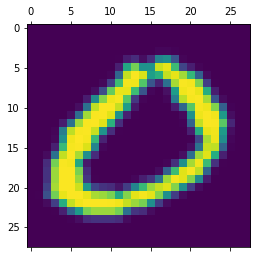

In [9]:
x_example = dataset.x_test[0:1]
plt.matshow(x_example[0])

x_example = np.expand_dims(x_example, -1)
print(x_example.shape)
preds = network.predict(x_example)
print(preds)

ind = np.argmax(preds)
print(ind)

print(dataset.mapping[ind])